# Classification avec KNN et visualisation des classes avec Plotly


Données extaites du site iNaturalist.org : https://www.inaturalist.org/pages/developers - http://www.inaturalist.org/observations/gbif-observations-dwca.zip

Le fichier en entrée est issu du notebook du modèle K MEANS qui permet de séparer les observations de Gorilles en 2 catégories : Gorilles de l'Est et Gorilles de l'Est.

### Objectif de ce notebook et du modèle de régression logistique : 

A partir de données d'observations catégorisées selon la géographie et dont le genre a déjà ét déterminé, soit par reconnaissance d'image soit par l'utilisateur, **permettre une détermination du taxon précis** de l'animal en se basant sur les informations de géolocalisation de l'image

Ce notebook présente une classification de données en utilisant le modèle K plus proches voisins (KNN) avec scikit-learn. 

## I- Import des bibliothèques nécessaires
Nous commençons par importer les bibliothèques nécessaires, notamment NumPy, Pandas, Plotly, scikit-learn, et les fonctions spécifiques pour le KNN. 

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

## II- Chargement des données


In [2]:
df = pd.read_csv('Genre_gorillas_post_KMEANS.csv') 


## III- Exploration et nettoyage des données

Suppression des lignes vides dans les colonnes latitude, longitude et taxon :

In [3]:
df = df.dropna(subset=['decimalLatitude', 'decimalLongitude', 'KMEANS_classification'])


Visualisation du dataframe

In [4]:
df

,eventDate,decimalLatitude,decimalLongitude,countryCode,stateProvince,taxonID,KMEANS_classification,Categorisation_KMeans
0,2022-04-08,-2.998760,10.053514,GA,Nyanga,147662,1,Gorilles de l'Ouest
1,2018-06-20,-1.112909,29.694889,UG,Kanungu,147661,0,Gorilles de l'Est
2,2012-02-20,6.026456,9.235325,CM,Sud-Ouest,126105,1,Gorilles de l'Ouest
3,2012-02-17,6.082184,9.690293,CM,Sud-Ouest,126105,1,Gorilles de l'Ouest
4,2013-06-13,-1.550271,29.477593,RW,Amajyaruguru,147661,0,Gorilles de l'Est
...,...,...,...,...,...,...,...,...
465,2021-12-01,-0.922922,29.676541,UG,Kanungu,147661,0,Gorilles de l'Est
466,2021-12-01,-0.889372,29.730451,UG,Kanungu,147661,0,Gorilles de l'Est
467,2021-12-01,-0.960235,29.751352,UG,Kanungu,147661,0,Gorilles de l'Est
468,2019-09-05,-1.577534,29.493780,RW,Amajyaruguru,147661,0,Gorilles de l'Est


Informations sur le dataframe :

In [5]:
df.count()

eventDate                470
decimalLatitude          470
decimalLongitude         470
countryCode              470
stateProvince            470
taxonID                  470
KMEANS_classification    470
Categorisation_KMeans    470
dtype: int64

Visualisation graphique des données

In [6]:
# Créez une carte en utilisant Plotly Express
fig = px.scatter_geo(df, 
                     lat='decimalLatitude', 
                     lon='decimalLongitude', 
                     color='Categorisation_KMeans',  
                     scope= 'africa',
                     title='Carte des points en fonction de la classification KMEANS')

fig.show()

## IV- Application du modèle de KNN

Détermination des colonnes features (X - df_data) et target (Y - df_target)

In [7]:
df_data = df[["decimalLatitude", "decimalLongitude"]]
df_target = df[["KMEANS_classification"]].values.ravel()

Séparation des données en test / train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=42)

In [8]:
df.head()

,eventDate,decimalLatitude,decimalLongitude,countryCode,stateProvince,taxonID,KMEANS_classification,Categorisation_KMeans
0,2022-04-08,-2.998760,10.053514,GA,Nyanga,147662,1,Gorilles de l'Ouest
1,2018-06-20,-1.112909,29.694889,UG,Kanungu,147661,0,Gorilles de l'Est
2,2012-02-20,6.026456,9.235325,CM,Sud-Ouest,126105,1,Gorilles de l'Ouest
3,2012-02-17,6.082184,9.690293,CM,Sud-Ouest,126105,1,Gorilles de l'Ouest
4,2013-06-13,-1.550271,29.477593,RW,Amajyaruguru,147661,0,Gorilles de l'Est


Normalisation de la donnée

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Application du modèle de KNN sur les données normalisées

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## IV- Prédictions et évauation du modèle

Prédiction des valeurs sur l'ensemble de test et évaluation de la précision du modèle

In [11]:
# Prédiction des valeurs sur l'ensemble de test
y_pred = knn.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)

print("Exactitude (Accuracy) : {:.2f}%".format(accuracy * 100))

Exactitude (Accuracy) : 100.00%


In [12]:
print('Accuracy on the training subset: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 1.000


Autres mesures de l'efficacité du modèle : 

In [13]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

# Courbe ROC et AUC-ROC
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # Probabilité de la classe positive
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Aire sous la courbe ROC (AUC-ROC) : {:.2f}".format(roc_auc))

# Courbe de précision-rappel et AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auc_pr = average_precision_score(y_test, y_pred_prob)
print("Aire sous la courbe précision-rappel (AUC-PR) : {:.2f}".format(auc_pr))

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score : {:.2f}".format(f1))

Matrice de confusion :
[[71  0]
 [ 0 23]]
Aire sous la courbe ROC (AUC-ROC) : 1.00
Aire sous la courbe précision-rappel (AUC-PR) : 1.00
F1-score : 1.00


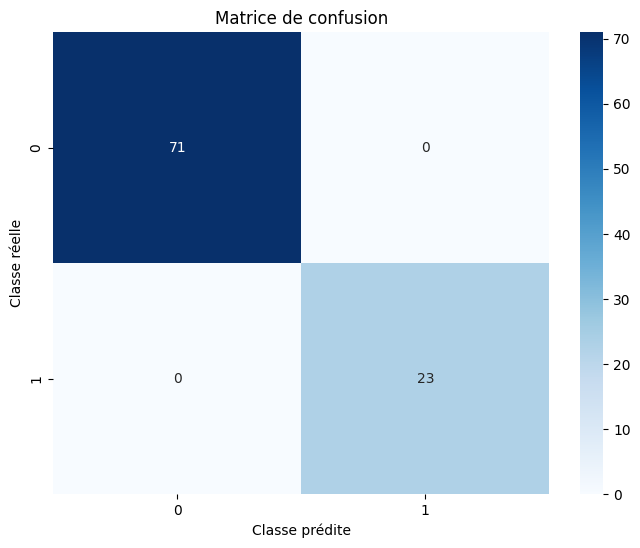

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de confusion")
plt.show()

Le modèle semble être très performant. La précision est de 100%, toutes les données ont été bien classées.

## VI- Tests avec de nouveaux points
Nous allons utiliser le modèle entraîné pour faire des prédictions. Je prends des points au hasard dans chacune des zones, tels que pourrait l'être des vrais observations géolocalisées :

In [15]:

#Ouest (1)
pointO1 = [[1.8259824050885027, 12.705422799371707]] 
pointO2 = [[3.115108062268557, 12.147813695772507]]
pointO3 = [[3.3748363438292013, 13.911535303549911]]
pointO4 = [[5.4599856131469355, 13.284331641623542]]
pointO5 = [[-2.733936088325529, 14.050518221304383]]
pointO6 = [[-0.30157590830458786, 10.747828031413784]]

#Est (0)
pointE1 = [[-0.22908880053824493, 27.963763368367037]]
pointE2 = [[0.5934202551099464, 28.952511950895403]]
pointE3 = [[-1.0153622370180027, 31.070815003050857]]
pointE4 = [[-1.4790428596850334, 30.606111546904092]]
pointE5 = [[0.02628534734844223, 30.000991340495343]]
pointE6 = [[-2.241248329626009, 28.72018163926347 ]]



Représentation des points de ces deux zones sur une carte : 

- Bleu : points existants d'observations de Gorilles de l'Ouest
- Orange : points pris au hasard dans cette zone géographique Ouest
- Rouge : points existants d'observations de Gorilles de l'Est
- Vert : points pris au hasard dans cette zone géographique Est)

In [16]:
fig_postreglog = px.scatter_geo(df, 
                     lat='decimalLatitude', 
                     lon='decimalLongitude', 
                     color='Categorisation_KMeans',
                     center={'lat': 5, 'lon': 20},
                     title='Carte des points en fonction de la classification KMEANS')


fig_postreglog.add_trace(go.Scattergeo(lat=[pointO1[0][0]],lon=[pointO1[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointO1'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointO2[0][0]],lon=[pointO2[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointO2'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointO3[0][0]],lon=[pointO3[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointO3'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointO4[0][0]],lon=[pointO4[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointO4'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointO5[0][0]],lon=[pointO5[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointO5'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointO6[0][0]],lon=[pointO6[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointO6'))

fig_postreglog.add_trace(go.Scattergeo(lat=[pointE1[0][0]],lon=[pointE1[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointE1'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointE2[0][0]],lon=[pointE2[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointE2'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointE3[0][0]],lon=[pointE3[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointE3'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointE4[0][0]],lon=[pointE4[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointE4'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointE5[0][0]],lon=[pointE5[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointE5'))
fig_postreglog.add_trace(go.Scattergeo(lat=[pointE6[0][0]],lon=[pointE6[0][1]], mode='markers', marker=dict(color='LIMEGREEN'), name='pointE6'))

fig_postreglog.show()

Normalisation de ces points selon le Scaler déjà entraîné sur nos données :

In [110]:
new_point_scaledO1 = scaler.transform(pointO1)
new_point_scaledO2 = scaler.transform(pointO2)
new_point_scaledO3 = scaler.transform(pointO3)
new_point_scaledO4 = scaler.transform(pointO4)
new_point_scaledO5 = scaler.transform(pointO5)
new_point_scaledO6 = scaler.transform(pointO6)

new_point_scaledE1 = scaler.transform(pointE1)
new_point_scaledE2 = scaler.transform(pointE2)
new_point_scaledE3 = scaler.transform(pointE3)
new_point_scaledE4 = scaler.transform(pointE4)
new_point_scaledE5 = scaler.transform(pointE5)
new_point_scaledE6 = scaler.transform(pointE6)

Détermination des catégories selon le modèle de régression logistique déjà entraîné :

In [111]:
predicted_categoryO1 = knn.predict(new_point_scaledO1)
predicted_categoryO2 = knn.predict(new_point_scaledO2)
predicted_categoryO3 = knn.predict(new_point_scaledO3)
predicted_categoryO4 = knn.predict(new_point_scaledO4)
predicted_categoryO5 = knn.predict(new_point_scaledO5)
predicted_categoryO6 = knn.predict(new_point_scaledO6)

predicted_categoryE1 = knn.predict(new_point_scaledE1)
predicted_categoryE2 = knn.predict(new_point_scaledE2)
predicted_categoryE3 = knn.predict(new_point_scaledE3)
predicted_categoryE4 = knn.predict(new_point_scaledE4)
predicted_categoryE5 = knn.predict(new_point_scaledE5)
predicted_categoryE6 = knn.predict(new_point_scaledE6)

Fonction qui permet d'avoir le libellé de la catégorie en fonction du code :

In [112]:
def cat(categorie):
    if categorie == [1]:
        return "Ouest"
    if categorie == [0]:
        return "Est"

Restitution des catégories prédites avec libellés : 

In [113]:
print("Prédiction de classement du point O1 : ", cat(predicted_categoryO1))
print("Prédiction de classement du point O2 : ", cat(predicted_categoryO2))
print("Prédiction de classement du point O3 : ", cat(predicted_categoryO3))
print("Prédiction de classement du point O4 : ", cat(predicted_categoryO4))
print("Prédiction de classement du point O5 : ", cat(predicted_categoryO5))
print("Prédiction de classement du point O6 : ", cat(predicted_categoryO6))

print(" ")

print("Prédiction de classement du point E1 : ", cat(predicted_categoryE1))
print("Prédiction de classement du point E2 : ", cat(predicted_categoryE2))
print("Prédiction de classement du point E3 : ", cat(predicted_categoryE3))
print("Prédiction de classement du point E4 : ", cat(predicted_categoryE4))
print("Prédiction de classement du point E5 : ", cat(predicted_categoryE5))
print("Prédiction de classement du point E6 : ", cat(predicted_categoryE6))

Prédiction de classement du point O1 :  Ouest
Prédiction de classement du point O2 :  Ouest
Prédiction de classement du point O3 :  Ouest
Prédiction de classement du point O4 :  Ouest
Prédiction de classement du point O5 :  Ouest
Prédiction de classement du point O6 :  Ouest
 
Prédiction de classement du point E1 :  Est
Prédiction de classement du point E2 :  Est
Prédiction de classement du point E3 :  Est
Prédiction de classement du point E4 :  Est
Prédiction de classement du point E5 :  Est
Prédiction de classement du point E6 :  Est
